In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,20)

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = to_categorical(iris.target)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
model = tf.keras.Sequential()

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
model.add(tf.keras.layers.Dense(units=4,activation='relu'))

In [9]:
model.add(tf.keras.layers.Dense(units=4,activation='relu'))

In [10]:
model.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=300,verbose=0,validation_data=(X_test,y_test),batch_size =32)

In [13]:
_,train_acc = model.evaluate(X_train,y_train)
_,test_acc = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9800


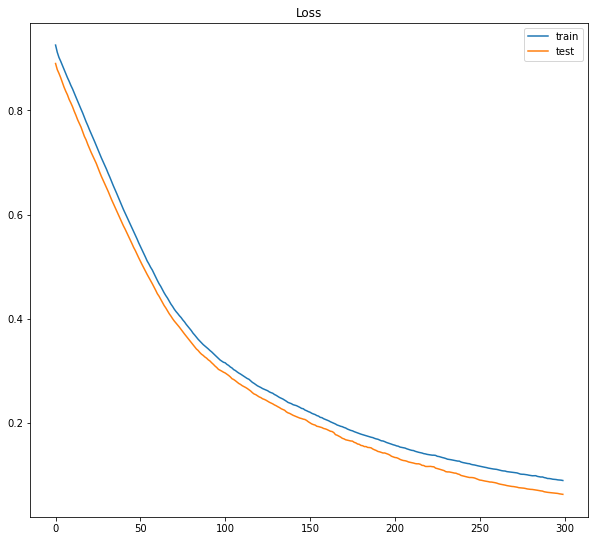

In [14]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

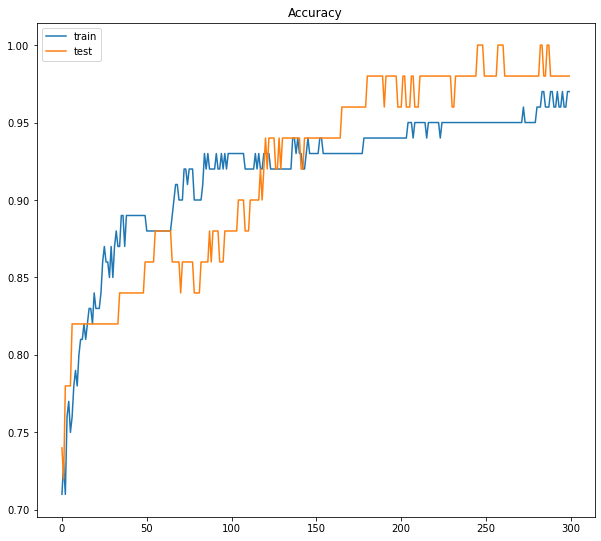

In [15]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()